---
# Unit06: Processing passive seismic data IV

This notebook has some practical processing activities of the Course **ProSeisSN**. It deals with time series processing using a passive seismic dataset using [ObsPy](https://docs.obspy.org/).

#### Dependencies: Obspy, Numpy, Matplotlib
#### Reset the Jupyter/IPython notebook in order to run it again, press:
***Kernel*** -> ***Restart & Clear Output***
#### The code $\Downarrow$ BELOW $\Downarrow$ runs a notebook with other dependencies

In [1]:
#------ Import Libraries
import sys
import os
    
#------ Work with the directory structure to include auxiliary codes
print('\n Local directory ==> ', os.getcwd())
print('  - Contents: ', os.listdir(), '\n')

path = os.path.abspath(os.path.join('..'))
if path not in sys.path:
    sys.path.append(path+"/CodePy")

%run ../CodePy/ImpMod.ipynb

#------ Alter default matplotlib rcParams
from matplotlib import rcParams
# Change the defaults of the runtime configuration settings in the global variable matplotlib.rcParams
plt.rcParams['figure.figsize'] = 9, 5
#plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams["figure.subplot.hspace"] = (.9)

#------ Magic commands
%matplotlib inline
%matplotlib widget


 Local directory ==>  /media/jmt/DATA/R-D/COURSES/COPPE_24/Github/Unit06
  - Contents:  ['.ipynb_checkpoints', 'array1.png', 'GS-20DXa.png', 'Nbk06.ipynb', 'Nbk06_old.ipynb', 'NetArr.png', 'tide.png', 'ttb22.png'] 

ObsPy version ==> 1.4.1


## Methods
One conceptual distinction between *array* and *network* is based on the spacing among array sensors and the wavelength of the signals.

- In the *array method* it is assumed some waveform coherence across different spatially-separated sensors.

- The *network method* assumes the waveforms at distinct sensors are uncorrelated.

- **The Network and Array Methods**
- Conceptually seismic data can be processed as a ’single station’, ’array’, and ’network’, in terms of how the spatially-separated sensors are used together, further conditioned by their signal and noise content. The crucial factor is the inter distance between sensors in terms of the waveform wavelength.
- In the ’array’ method one assumes some waveform coherence across different  sensors.
- Typically in the ’network’ method do not make this assumption, and treat waveforms at spatially-separated
sensors as uncorrelated- Conceptually seismic data can be processed as a ’single station’, ’array’, and ’network’, in terms of how the spatially-separated sensors are used together, further conditioned by their signal and noise content. The crucial factor is the inter distance between sensors in terms of the waveform wavelength.
- In the ’array’ method one assumes some waveform coherence across different  sensors.
- Typically in the ’network’ method do not make this assumption, and treat waveforms at spatially-separated
sensors as uncorrelated

<img src="./NetArr.png" width="300">

---
## Read a data set from TTB22
As ondas sísmicas geradas pela transferência da energia do fluxo turbulento no estuário do Rio Amazonas, resultante das suas grandes marés, por forças friccionais às rugosidades do seu fundo. O arranjo sísmico foi instalado na Ilha de Tatuoca, como tal o arranjo está circundado por uma distribuição de fontes no leito do rio. Fontes e geofones estão na superfície, tornando as ondas de superfície francamente dominantes em relação às de volume.
### The Experiment
- **The Receiver Array**
The array has 24 GS-20DX vertical geophones hooked to a $L=69$m cable, using takeouts spaced $\delta l=6$m from each other. The GS-20DX geophones have a natural frequency of $f_n=10\textrm{Hz}$, and a spurious frequency $f_{sp}>250$Hz. The array has a irregular circular shape, deployed in the Southern tip of the island, with its center at $\left(1^{\circ}12^{\prime}6.93^{\prime\prime}\textrm{S},48^{\circ}30^{\prime}23.39^{\prime\prime}\textrm{S}\right)$.

<img src="./ttb22.png" width="600">

- **The Geophones**
The GS-20DX vertical geophone has the following characteristics,
| :-: | :-: |
| Cut-off frequency | Spurious Frequency |
|$f_c=10$Hz | $f_{sp}>250$Hz|

(i) $f_{sp}$ is the resonance of the system perpendicular to this normal working axis; a combination of multiple modes of movement. $f_{Sp}$ should be above the anti--alias frequency of the recording system. The spurious frequency should not present a serious problem, unless in the presence of strong motion.

(ii) The natural and the spurious frequencies, $f_c$ and $f_{Sp}$, effectively set the limits of usable recording bandwidth of a geophone, due to the change of phase and a strong variation in sensitivity in the geophone output.

<img src="./GS-20DXa.png" width="600">

- **The data**
Each of the 12 traces of **file 3804** is $\Delta T=60$s long, with a sampling frequency of $f_{s}=250$Hz. This file was recorded on 2022-04-02, begining at 13h 56min 41s. That was during the maximum gradient of the local ebb tide.

<img src="./tide.png" width="500">


>> Read with data file 3804
1) Gather acquired on 2022-04-02T13:56:41.000000Z, has 24 geophones along 69.0m.
2) Each 59.996s-long trace has 15000 data points.
3) The sampling frequency is 250.0Hz


/home/jmt/miniforge3/envs/pSeis/lib/python3.12/site-packages/obspy/io/seg2/seg2.py:246: UserWarning: Non-zero value found in Trace's 'DELAY' field. This is not supported/tested yet and might lead to a wrong starttime of the Trace. Please contact the ObsPy developers with a sample file.
  warnings.warn(msg)
/home/jmt/miniforge3/envs/pSeis/lib/python3.12/site-packages/obspy/io/seg2/seg2.py:365: UserWarning: Many companies use custom defined SEG2 header variables. This might cause basic header information reflected in the single traces' stats to be wrong (e.g. recording delays, first sample number, station code names, ..). Please check the complete list of additional unmapped header fields that gets stored in Trace.stats.seg2 and/or the manual of the source of the SEG2 files for fields that might influence e.g. trace start times.
  warnings.warn(WARNING_HEADER)


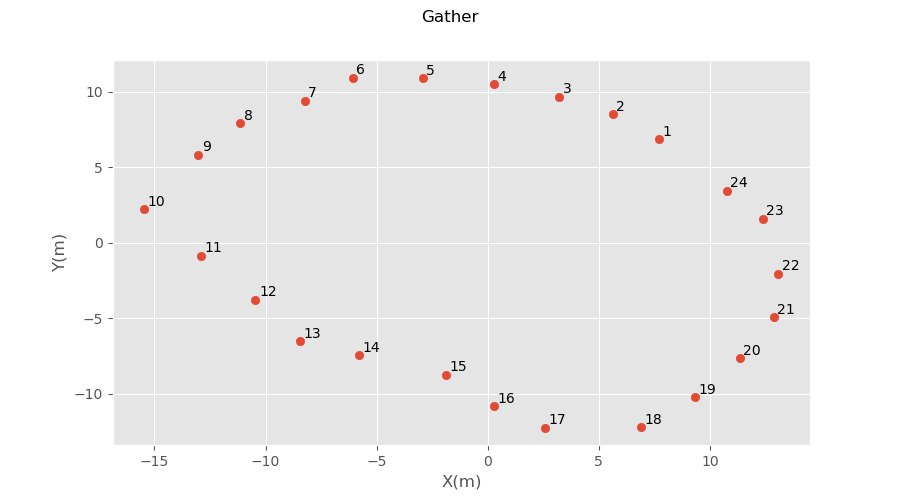

''

In [2]:
"""
====================== A local routine to read a CSV file ======================
Read a cvs file and stores the information in an object numpy array
"""
def RGloc(filename):
    try:
        with open(filename, 'r') as file:
            lines = file.readlines()
            data = []
            for line in lines[1:]:               # Skip header row
                parts = line.strip().split(',')
                data.append([int(parts[0]), float(parts[1]), float(parts[2])])
        return np.array(data, dtype=object)
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return None                                 
#
"""
====================== READ THE SEISMIC DATA LOCALLY ======================
"""
#
#------ Read the seismic data
filename = '3804'
print(f">> Read with data file {filename}")
filename = '../Data/'+filename+'.dat'   
#------- Read the data file as a SEG2 object
st = read(filename)
#
#------- Print stream information
dummy = float(st[-1].stats.seg2.RECEIVER_LOCATION)
print(f"1) Gather acquired on {st[0].stats.starttime}, has {len(st)} geophones along {dummy}m.")
dummy = (UTCDateTime(st[0].stats.endtime) - UTCDateTime(st[0].stats.starttime))
print(f"2) Each {dummy}s-long trace has {int(st[0].stats.npts)} data points.")
print(f"3) The sampling frequency is {st[0].stats.sampling_rate}Hz")
#
"""
====================== READ THE PHONES LOCATIONS ======================
"""
#------ Read the phones metric locations
#--- Reads the CSV file with (x, y)m locations
ttb_loc = RGloc('../Data/'+'ttb_loc.dat')
#
#------ Read the phones geographic locations
#--- Reads the CSV file with (lat,lon) in degress locations
ttb_gloc = RGloc('../Data/'+'ttb_gloc.dat')
#
#------ Plot gather in cartesian
p.pgather(ttb_loc[:,1], ttb_loc[:,2], ttb_loc[:,0], coord='cartesian')

---
## Have a look on one trace.

>> Plot phone 1


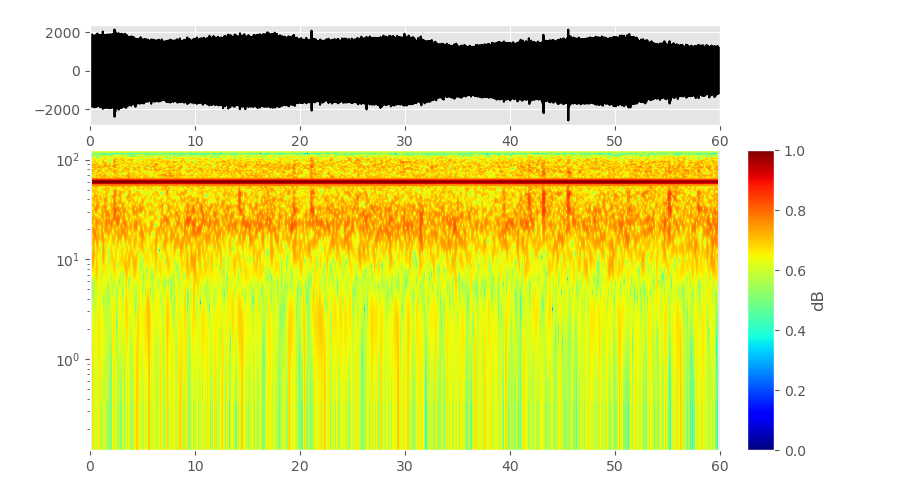

In [3]:
#------ Plot a randon phone
#dummy = np.random.randint(1, len(st)+1)
dummy = 1
print(f">> Plot phone {dummy}")
#st[dummy].plot(color='blue', type='relative', handle=True)
#
#------- Deep copy of the trace
trZ = st[dummy-1].copy()
tr0 = st[dummy-1].copy()
#
#--- relative time: nummpy array
time = trZ.times(type="relative")
#
#------ Plot Spectrogram 
p.Pspect(time, st[dummy-1])

---
## Filter out 60Hz spectral line
TTB 60Hz spectral line is around $l=60.015$Hz with an 1/2 width rejection band of $\delta l=0.8$Hz. This points to a rejection band of
$$\varDelta L=\left[59.2,60.8\right]$$
$$\underset{l-\delta l}{\cdots|\cdots}\cdots\cdots\underset{l}{|}\cdots\cdots\underset{l+\delta l}{\cdots|\cdots}$$


Enter the filter, lower freq., upper freq., filter order, zerophase: ftype, f0, f1, nc, zP
 Filter minimum options:
                lp (lowpass)  -> f0         is required
                hp (highpass) -> f0         is required
                bp (bandpass) -> f0 and f1 are required
                bs (bandstop) -> f0 and f1 are required


 Enter ftype, f0, f1, nc and zP (dflt: Nc=4, zP=True):  bs 59.2 60.8


>> Useful frequency range after filtering [59.2, 60.8]Hz


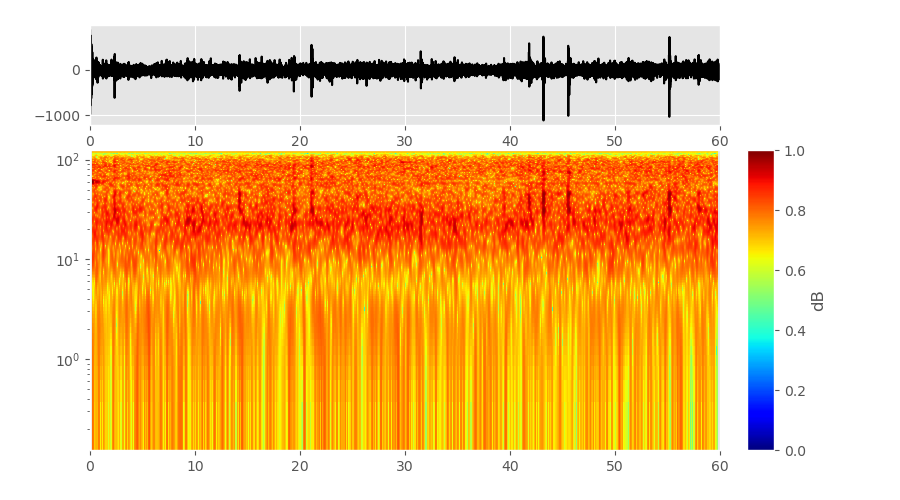

 Run this cell again (rtn= No)?:  


 Resuls saved + a safety trace copy was created.


In [4]:
#------ Notch 60Hz spectral line. Hint: bs 59.2 60.8
trZ, ftype, flims = u.TrFlt(trZ)
#           +---+─> [fmin, fmax] = useful frequency range due to filter
print(f">> Useful frequency range after filtering [{flims[0]}, {flims[1]}]Hz")
#
#------ Plot Spectrogram
p.Pspect(time, trZ)
#
#-------- Save trace for the next cell + append to the processing flux
tr0, trZ, _ = u.AuxReset(tr0, trZ)

---
## Further Processing
### Filter the data
- Specify a bandpass filter considering the response of the sensor as well as the dataset constraints.
### Taper the data window
- Use the **Hanning Window**, which uses a cosine function to taper at both ends. Hint: 0.2.
### Have another look at the data...

Enter the filter, lower freq., upper freq., filter order, zerophase: ftype, f0, f1, nc, zP
 Filter minimum options:
                lp (lowpass)  -> f0         is required
                hp (highpass) -> f0         is required
                bp (bandpass) -> f0 and f1 are required
                bs (bandstop) -> f0 and f1 are required


 Enter ftype, f0, f1, nc and zP (dflt: Nc=4, zP=True):  bp 5 50
 Enter the percentage to taper window ends (rtn=0.1)
 


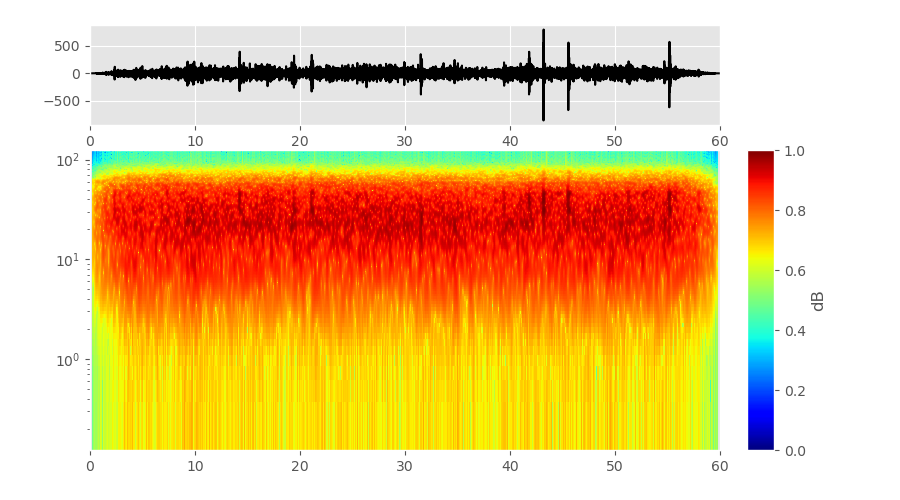

 Run this cell again (rtn= No)?:  


 Resuls saved + a safety trace copy was created.


In [5]:
#
#-------- Filter the data. Hint: bp 5 50
trZ, ftype, flims = u.TrFlt(trZ)
#
#-------- Taper the data
ent = input(f' Enter the percentage to taper window ends (rtn=0.1)\n') or '0.1'
ent = float(ent)
# Apply Hanning on the signal
trZ.taper(type = 'hann', max_percentage = ent)
#
#------ Plot Spectrogram
p.Pspect(time, trZ)
#
#-------- Save trace for the next cell + append to the processing flux
tr0, trZ, _ = u.AuxReset(tr0, trZ)

---
## Display all the data as a seismogram
- Process the whole stream.
- A distance dependent plot shows the different move-out of seismic arrivals and gives an idea of the  backazimuth and slowness that could be expected.

>> Notch the data
Enter the filter, lower freq., upper freq., filter order, zerophase: ftype, f0, f1, nc, zP
 Filter minimum options:
                lp (lowpass)  -> f0         is required
                hp (highpass) -> f0         is required
                bp (bandpass) -> f0 and f1 are required
                bs (bandstop) -> f0 and f1 are required


 Enter ftype, f0, f1, nc and zP (dflt: Nc=4, zP=True):  bs 59.2 60.8


>> Bandpass filter the data
Enter the filter, lower freq., upper freq., filter order, zerophase: ftype, f0, f1, nc, zP
 Filter minimum options:
                lp (lowpass)  -> f0         is required
                hp (highpass) -> f0         is required
                bp (bandpass) -> f0 and f1 are required
                bs (bandstop) -> f0 and f1 are required


 Enter ftype, f0, f1, nc and zP (dflt: Nc=4, zP=True):  bp 5 50


>> Useful range due to bandpass 5.0 50.0 filter: 5.0 to 50.0Hz.


 Enter the percentage to taper window ends (rtn=0.1)
 


>> Window the data


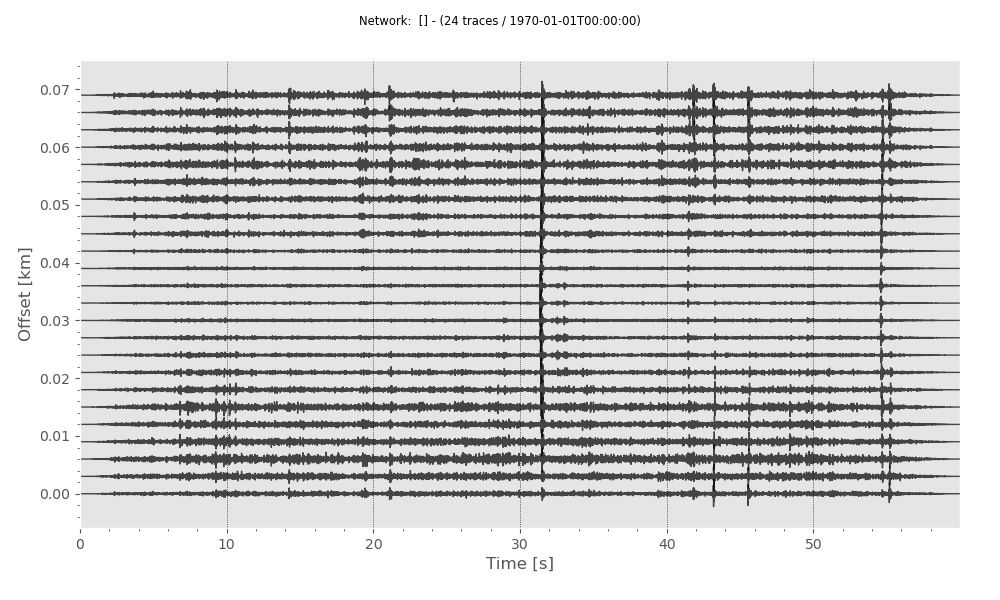

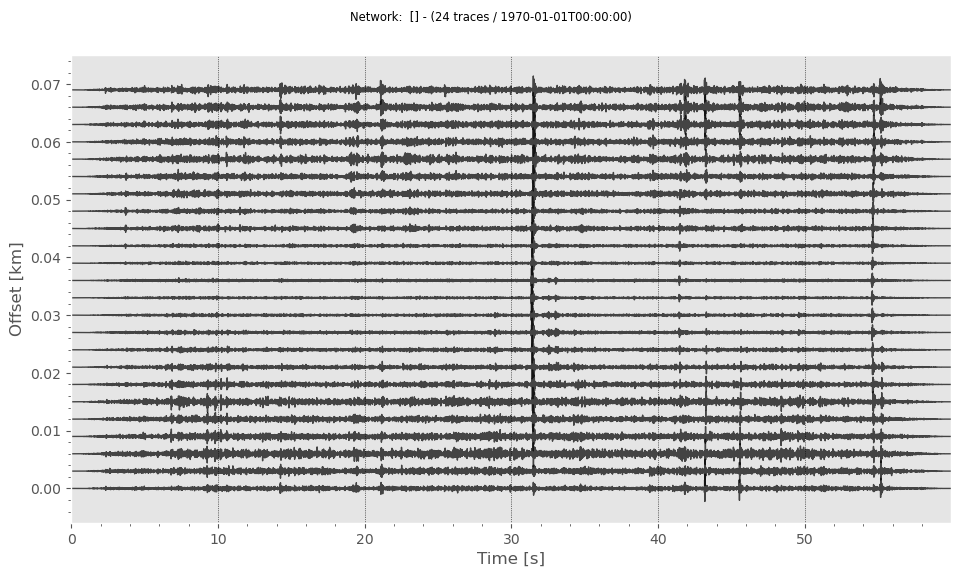

In [6]:
"""
====================== WORK WITH THE WHOLE GATHER ======================
"""
#
#------ Notch 60Hz spectral line.
print(f">> Notch the data")
st, ftype, flims = u.TrFlt(st)
#
#-------- Bandpass filter the data.
print("\r", end="")
print(f">> Bandpass filter the data")
st, ftype, flims = u.TrFlt(st)
print(f">> Useful range due to {ftype} filter: {flims[0]} to {flims[1]}Hz.")
#
#-------- Taper the data
print("\r", end="")
ent = input(f' Enter the percentage to taper window ends (rtn=0.1)\n') or '0.1'
ent = float(ent)
# Apply Hanning on the signal
print(f">> Window the data")
st.taper(type = 'hann', max_percentage = ent)
#
""" 
    Create a new stream and loop over traces. Add the distance information
    in the “header” and then add that trace to the stream.
"""
gather = Stream()
for ind, tr in enumerate(st):
#    if ind ==0: starttime = tr.stats.starttime
#    tr.stats.starttime = tr.stats.starttime - starttime
    tr.stats['distance'] = st[ind].stats.seg2.RECEIVER_LOCATION
    tr.stats.starttime = float(0)
    gather += tr
#------ Plot
gather.plot(type='section',
            scale=1.3, alpha=.7,
            orientation='horizontal')

 Enter t0 and t1 to zoom:  30 34


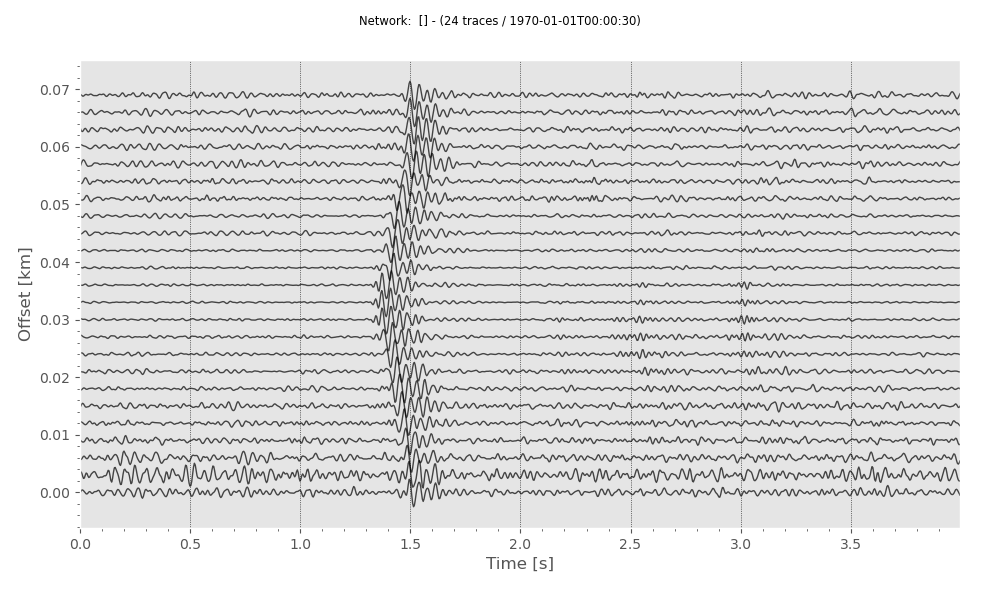

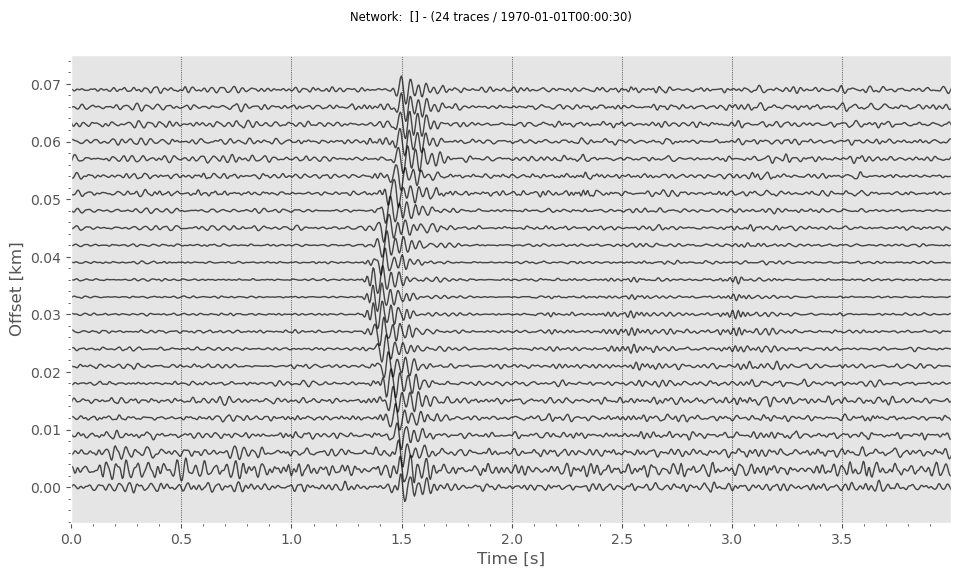

In [7]:
#
#------ Zoom in the seismogram
ent = input(f' Enter t0 and t1 to zoom: ')
ent = ent.rstrip().split(' ')
f0 = float(ent[0])
f1 = float(ent[1])
#
dt = gather[0].stats.starttime
gather.plot(type='section',
            scale=1.3, alpha=.7,
            starttime=dt+f0, endtime=dt+f1,
            orientation='horizontal')

## The Array Method
A wavefront arrives at the surface at an angle $i$ with the vertical. The wave propagates toward the surface with a velocity $v_{c}=\frac{\Delta s}{\varDelta t}$, with a horizontal component $v_{h}=\frac{\Delta x}{\varDelta t}$. By geometry, the inclination angle and distances are related through:

The direction-of-arrival (DOA) of a planar wavefront onto a seismic 2-D array can be described by the horizontal slowness, $u_h$, which is the inverse value of horizontal apparent velocity, $1/v_{h}$
$$
u_{h}=\frac{1}{v_{h}}=\frac{\sin i}{\left|\mathbf{v}_{c}\right|},
$$
being related to: (a) the angle of incidence $i$, (b) the true velocity $v_c$ and (c) its azimuth with the North *toward* the epicenter; the **baz** ($\theta$).
$$
\boldsymbol{U}_0 = (\frac{\sin\theta}{v_{h}},\frac{\cos\theta}{v_{h}},\frac{1}{v_{h}\tan i})
                 = \frac{1}{v_{c}}(\sin i\sin\theta,\sin i\cos\theta,\cos i)
                 = u_{h}(\sin\theta,\cos\theta,\frac{1}{\tan i})
                 = \frac{1}{v_{c}}(\sin i\sin\theta,\sin i\cos\theta,\cos i).
$$
### Beamforming
The seismic signals at each sensor can be time-shifted and summed to enhance the S/N ratio by a factor of $\sqrt{N}$, the signal interfering constructively. If a given sensor location in relation to the geographic center of the array is $\boldsymbol{r}_{i},\,i=1,\ldots,N$, its relative time shift is
$$
\tau_{i}=\boldsymbol{r}_{i}.\boldsymbol{u}.
$$
The beamforming for the array is,
$$
		b\left(t\right)=\frac{1}{N}\mathop{\sum_{i=1}^{N}s_{i}\left(t+
			\mathbf{r}_{i}\mathbf{\cdot u}\right)}=\frac{1}{N}\mathop{\sum_{i=1}^{N}s_{i}\left(t+\tau_{i}\right)}.
$$

Beamforming can be used to enhance a given phase with a known backazimuth and slowness. Wrong backazimuths produce misleading waveforms.

<img src="./array1.png" width="600">

In [9]:
#
# ---------- Beamforming - FK Analysis
out, stime, etime = u.BeamFK(st, flims, ttb_gloc)
#-- Make output human readable
t, rel_power, abs_power, baz, slow = out.T
#------------ Plot
plt.pltbaz(out, stime , etime)
#------------- print
sys.stdout.write('\n')
header_row = ['t', 'rel_power', 'abs_power', 'baz', 'slow']
print(f'>> {header_row}')    
print(out)


>> Select start and end times (s) for beanforming
  stime etime
    └─────│──> Initial event time
          └──> Final event time


   Enter t0 t1:
 30 34



>>  F-K parameters
{'etime': UTCDateTime(1970, 1, 1, 0, 0, 34),
 'frqhigh': 50.0,
 'frqlow': 5.0,
 'prewhiten': 0,
 'semb_thres': -1000000000.0,
 'sl_s': 0.03,
 'sll_x': -3.0,
 'sll_y': -3.0,
 'slm_x': 3.0,
 'slm_y': 3.0,
 'stime': UTCDateTime(1970, 1, 1, 0, 0, 30),
 'timestamp': 'julsec',
 'vel_thres': -1000000000.0,
 'win_frac': 0.1,
 'win_len': 1.0}
array([[1, -1.2018629051173761, -48.50642892738291],
       [2, -1.201848243941277, -48.50644759995284],
       [3, -1.201837791472329, -48.50646922976006],
       [4, -1.2018302854864569, -48.506495620323776],
       [5, -1.2018266779446278, -48.506524398987565],
       [6, -1.2018262254510503, -48.50655270874571],
       [7, -1.2018401563075696, -48.50657201196888],
       [8, -1.2018535309111802, -48.50659810863342],
       [9, -1.2018726023488353, -48.506615053699555],
       [10, -1.2019051492547352, -48.50663688752441],
       [11, -1.2019329888162655, -48.50661380054925],
       [12, -1.2019593897756233, -48.50659186855304],
    

AttributeError: module 'matplotlib.pyplot' has no attribute 'pltbaz'

---
